In [170]:
import pandas as pd
import numpy as np
from fancyimpute import KNN # pip install fancyimpute
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("jobs.csv")
df

,Unnamed: 0,Created_date,Due_date,Job_id,Payment_type,Budget,Job_title,Category,Subcategory,Job_description,...,Link_of_employer,Employer_id,No_of_quotes,Link_of_quoters,No_of_Premium_quotes,Link_of_premium_quoters,No_of_inviited,Link_of_invited_freelancers,No_of_Hired,Link_of_hired_freelancers
0,0,"Nov 16, 2020","December 18, 2020",1731482,Fixed Price,[' Under $250'],Society Management app (Android/IOS),Programming & Development,Apps & Mobile,We are looking for mobile app developer (fulls...,...,https://www.guru.com/work/detail/1731482,1731482,9,"['https://www.guru.com/freelancers/scopic', 'h...",0,[],0,[],0,[]
1,1,"Nov 16, 2020","Hiring more, till Dec 17, 2020",1731479,Fixed Price or Hourly,NaN,GPRS tracking device/Server,Programming & Development,Programming & Software,I want to be able to track vehicles thus neede...,...,https://www.guru.com/work/detail/1731479,1731479,7,['https://www.guru.com/freelancers/ravi-deshmu...,0,[],1,['https://www.guru.com/freelancers/spinlogics'],1,['https://www.guru.com/freelancers/ravi-deshmu...
2,2,"Nov 16, 2020","December 16, 2020",1731480,Fixed Price,[' Under $250'],create + edit two certificates,Design & Art,Graphic Design,I need a graphics artist/photoshop/illustrator...,...,https://www.guru.com/work/detail/1731480,1731480,23,['https://www.guru.com/freelancers/ammaramjad'...,0,[],0,[],0,[]
3,3,"Nov 16, 2020","December 16, 2020",1731476,Fixed Price,[' $1k-$2.5k'],2 WEBSITE DEVELOPMENT,Programming & Development,Web Development & Design,We need two website design\n\n1. This process ...,...,https://www.guru.com/work/detail/1731476,1731476,26,['https://www.guru.com/freelancers/amazon-soft...,0,[],0,[],0,[]
4,4,"Nov 16, 2020","December 16, 2020",1731463,Fixed Price,[' Under $250'],digital coloring work for comic,Design & Art,Photo / Image Restoration & Editing,looking for digital coloring work for kids com...,...,https://www.guru.com/work/detail/1731463,1731463,13,['https://www.guru.com/freelancers/tania-arts'...,0,[],0,[],0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,1460,"Feb 11, 2017","June 21, 2030",1331813,Hourly,"[' No rate specified ', ' 10-30 hrs/wk ', ' 6+...",Help create networks from RNA Seq. data,Other,NaN,Patient Tutor to teach Time Series Cell Cycle ...,...,https://www.guru.com/work/detail/1331813,1331813,14,['https://www.guru.com/freelancers/bonzai-crea...,0,['https://www.guru.com/freelancers/bonzai-crea...,0,[],0,[]
1461,1461,"Dec 14, 2016","May 01, 2023",1314351,Hourly,"[' $5 - $10 ', ' 30+ hrs/wk ', ' 6+ months']",SEO my site who sell instagram followers,Sales & Marketing,NaN,Project Description\n\nI need my website showi...,...,https://www.guru.com/work/detail/1314351,1314351,90,['https://www.guru.com/freelancers/raheela-khu...,0,[],0,['https://www.guru.com/freelancers/raheela-khu...,0,[]
1462,1462,"Mar 14, 2016","April 27, 2021",1225615,Hourly,"[' No rate specified ', ' 10-30 hrs/wk ', ' 6+...",Analyzing microarray time series data,Other,NaN,Help in analyzing yeast microarray time series...,...,https://www.guru.com/work/detail/1225615,1225615,19,['https://www.guru.com/freelancers/yesesri-che...,0,[],0,[],0,[]
1463,1463,"Sep 30, 2015","December 31, 2023",1174444,Fixed Price,[' $500-$1k'],"Need a Custom, Print-Ready Folder Design",Design & Art,NaN,I need a presentation folder designed for an e...,...,https://www.guru.com/work/detail/1174444,1174444,100,['https://www.guru.com/freelancers/live-deftso...,1,[],0,[],0,[]


#### Identifying unique category

In [171]:
unique_category = df['Category'].unique()
unique_category

array(['Programming & Development', 'Design & Art', 'Other',
       'Sales & Marketing', 'Writing & Translation',
       'Administrative & Secretarial', 'Education & Training',
       'Business & Finance', 'Engineering & Architecture', 'Legal'],
      dtype=object)

#### Creating subset dataset

In [172]:
df2 = df[['Budget', 'Category']]
df2

,Budget,Category
0,[' Under $250'],Programming & Development
1,NaN,Programming & Development
2,[' Under $250'],Design & Art
3,[' $1k-$2.5k'],Programming & Development
4,[' Under $250'],Design & Art
...,...,...
1460,"[' No rate specified ', ' 10-30 hrs/wk ', ' 6+...",Other
1461,"[' $5 - $10 ', ' 30+ hrs/wk ', ' 6+ months']",Sales & Marketing
1462,"[' No rate specified ', ' 10-30 hrs/wk ', ' 6+...",Other
1463,[' $500-$1k'],Design & Art


#### Splitting budget column into three 

In [173]:
new = df2["Budget"].str.split(",", n = 2, expand = True)
df2["New_Budget"] = new[0]

In [174]:
df3 = df2[['New_Budget', 'Category']]
df3

,New_Budget,Category
0,[' Under $250'],Programming & Development
1,NaN,Programming & Development
2,[' Under $250'],Design & Art
3,[' $1k-$2.5k'],Programming & Development
4,[' Under $250'],Design & Art
...,...,...
1460,[' No rate specified ',Other
1461,[' $5 - $10 ',Sales & Marketing
1462,[' No rate specified ',Other
1463,[' $500-$1k'],Design & Art


#### Since 'Budget' is a categorical column we try to find unique values

In [175]:
unique_Budget = df3['New_Budget'].unique()
unique_Budget

array(["[' Under $250']", nan, "[' $1k-$2.5k']", "[' $500-$1k']",
       "[' $15 - $25 '", "[' $10 - $20 '", "[' $7 - $15 '",
       "[' $250-$500']", "[' $5 - $15 '", "[' $10 - $15 '",
       "[' $6 - $12 '", "[' $10 - $30 '", "[' No rate specified '",
       "[' $20 - $50 '", "[' $15 - $35 '", "[' $5 - $8 '", "[' Max $10 '",
       "[' Min $80 '", "[' $50 - $100 '", "[' $15 - $20 '",
       "[' $30 - $50 '", "[' $17 - $40 '", "[' $100 - $400 '",
       "[' $50 - $150 '", "[' $5 - $10 '", "[' $30 - $39 '",
       "[' $25 - $30 '", "[' $4 - $8 '", "[' $15 - $45 '",
       "[' $2.5k-$5k']", "[' $20 - $25 '", "[' $20 - $30 '",
       "[' $1 - $10 '", "[' $25 - $40 '", "[' $10k-$25k']",
       "[' $8 - $12 '", "[' $20 - $60 '", "[' $10 - $50 '",
       "[' $12 - $14 '", "[' $10 - $18 '", "[' $1 - $5 '",
       "[' $29 - $55 '", "[' Min $7 '", "[' Min $15 '", "[' $8 - $15 '",
       "[' $25 - $75 '", "[' Max $200 '", "[' $25 - $200 '",
       "[' $10 - $12 '", "[' $15 - $50 '", "[' $5k-$10

#### One Hot Encoding: The process to pull non-null data, encode it and return it to the dataset is below.

In [176]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()

# create a list of categorical columns to iterate over
cat_cols = ['New_Budget','Category']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df3[columns])

In [177]:
df3

,New_Budget,Category
0,108,7.0
1,NaN,7.0
2,108,2.0
3,26,7.0
4,108,2.0
...,...,...
1460,106,6.0
1461,66,8.0
1462,106,6.0
1463,76,2.0


#### All text values have been encoded, now that we have values that our imputer can calculate.
#### We can impute the data, convert the data back to a DataFrame and add back in the column names.

In [178]:
# impute data and convert 
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df3)),columns = df3.columns)

Imputing row 1/1465 with 0 missing, elapsed time: 0.448
Imputing row 101/1465 with 1 missing, elapsed time: 0.453
Imputing row 201/1465 with 0 missing, elapsed time: 0.458
Imputing row 301/1465 with 0 missing, elapsed time: 0.461
Imputing row 401/1465 with 0 missing, elapsed time: 0.465
Imputing row 501/1465 with 0 missing, elapsed time: 0.469
Imputing row 601/1465 with 0 missing, elapsed time: 0.472
Imputing row 701/1465 with 0 missing, elapsed time: 0.474
Imputing row 801/1465 with 0 missing, elapsed time: 0.476
Imputing row 901/1465 with 0 missing, elapsed time: 0.479
Imputing row 1001/1465 with 0 missing, elapsed time: 0.481
Imputing row 1101/1465 with 0 missing, elapsed time: 0.484
Imputing row 1201/1465 with 0 missing, elapsed time: 0.486
Imputing row 1301/1465 with 1 missing, elapsed time: 0.489
Imputing row 1401/1465 with 1 missing, elapsed time: 0.491


In [179]:
encode_data

,New_Budget,Category
0,108.0,7.0
1,62.0,7.0
2,108.0,2.0
3,26.0,7.0
4,108.0,2.0
...,...,...
1460,106.0,6.0
1461,66.0,8.0
1462,106.0,6.0
1463,76.0,2.0


#### Perform clustering using Pycaret

https://pycaret.readthedocs.io/en/latest/api/clustering.html

In [180]:
from pycaret.clustering import *

In [181]:
exp_name = setup(encode_data, normalize=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,7628
1,Original Data,"(1465, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(1465, 2)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [182]:
kmeans = create_model('kmeans')

,Metric
Silhouette,0.5345
Calinski-Harabasz,1925.0573
Davies-Bouldin,0.7074


In [183]:
dbscan = create_model('dbscan')

,Metric
Silhouette,0.4736
Calinski-Harabasz,5.8586
Davies-Bouldin,0.3755


In [155]:
ap = create_model('ap') # Affinity Propagation 

""


In [184]:
meanshift = create_model('meanshift') # Mean Shift 

,Metric
Silhouette,0.4912
Calinski-Harabasz,1122.8263
Davies-Bouldin,0.8466


In [185]:
sc = create_model('sc') # Spectral Clustering

,Metric
Silhouette,0.5183
Calinski-Harabasz,1579.6521
Davies-Bouldin,0.5954


In [186]:
hclust = create_model('hclust') # Agglomerative Clustering

,Metric
Silhouette,0.5296
Calinski-Harabasz,1894.9907
Davies-Bouldin,0.7265


In [139]:
optics = create_model('optics')

,Metric
Silhouette,0.8022
Calinski-Harabasz,212.5574
Davies-Bouldin,1.2955


In [187]:
birch = create_model('birch')

,Metric
Silhouette,0.5148
Calinski-Harabasz,1467.3888
Davies-Bouldin,0.6512


In [188]:
kmodes = create_model('kmodes')

,Metric
Silhouette,-0.0437
Calinski-Harabasz,42.6622
Davies-Bouldin,1.9871


In [189]:
plot_model(kmeans)

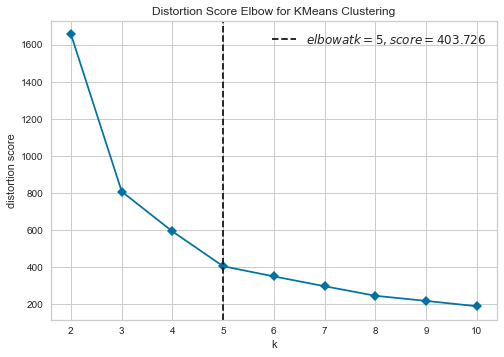

In [190]:
plot_model(kmeans, plot = 'elbow')

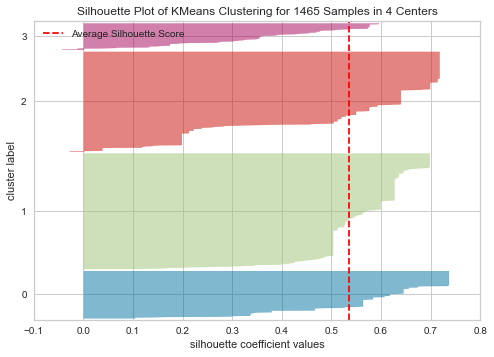

In [191]:
plot_model(kmeans, plot = 'silhouette')

In [192]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [193]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…